In [27]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

In [4]:
import zipfile
import os

# Define the path to the uploaded file
zip_file_path = r"C:\Users\91751\Downloads\PRCP-1001-RiceLeaf.zip"
extract_folder = r"C:\Users\91751\Downloads\Rice_Leaf"

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List the extracted contents
extracted_files = os.listdir(extract_folder)
extracted_files

['Data']

In [5]:
# List the contents of the "Data" directory
data_folder = os.path.join(extract_folder, "Data")
data_contents = os.listdir(data_folder)
data_contents

['Bacterial leaf blight-20200814T055237Z-001.zip',
 'Brown spot-20200814T055208Z-001.zip',
 'Leaf smut-20200814T055530Z-001.zip']

In [6]:
# Extract one of the disease folders to check its structure
sample_zip_path = os.path.join(data_folder, "Leaf smut-20200814T055530Z-001.zip")
sample_extract_folder = os.path.join(data_folder, "Leaf_Smut")

# Extract the ZIP file
with zipfile.ZipFile(sample_zip_path, 'r') as zip_ref:
    zip_ref.extractall(sample_extract_folder)

# List the extracted contents
sample_files = os.listdir(sample_extract_folder)
sample_files[:10]  # Show first 10 files if there are many


['Leaf smut']

In [7]:
# Extract one of the disease folders to check its structure
sample_zip_path = os.path.join(data_folder, "Brown spot-20200814T055208Z-001.zip")
sample_extract_folder = os.path.join(data_folder, "Brown spot")

# Extract the ZIP file
with zipfile.ZipFile(sample_zip_path, 'r') as zip_ref:
    zip_ref.extractall(sample_extract_folder)

# List the extracted contents
sample_files = os.listdir(sample_extract_folder)
sample_files[:10]  # Show first 10 files if there are many


['Brown spot']

In [10]:
# Extract one of the disease folders to check its structure
sample_zip_path = os.path.join(data_folder, "Leaf smut-20200814T055530Z-001.zip")
sample_extract_folder = os.path.join(data_folder, "Leaf smut")

# Extract the ZIP file
with zipfile.ZipFile(sample_zip_path, 'r') as zip_ref:
    zip_ref.extractall(sample_extract_folder)

# List the extracted contents
sample_files = os.listdir(sample_extract_folder)
sample_files[:10]  # Show first 10 files if there are many

['Leaf smut']

In [11]:
# List contents inside the "Leaf smut" folder
leaf_smut_images_folder = os.path.join(sample_extract_folder, "Leaf smut")
leaf_smut_images = os.listdir(leaf_smut_images_folder)

# Display the first few image files
leaf_smut_images[:10]

['DSC_0293.JPG',
 'DSC_0308.JPG',
 'DSC_0309.JPG',
 'DSC_0310.JPG',
 'DSC_0312.JPG',
 'DSC_0313.JPG',
 'DSC_0314.JPG',
 'DSC_0315.jpg',
 'DSC_0316.JPG',
 'DSC_0317.JPG']

In [12]:
import shutil

# Define a structured dataset folder
structured_dataset_path = r"C:\Users\91751\Downloads\Rice_Leaf\Data\rice_leaf_structured"
os.makedirs(structured_dataset_path, exist_ok=True)

# Define class names based on available zip files
class_names = {
    "Leaf smut": "Leaf smut-20200814T055530Z-001.zip",
    "Brown spot": "Brown spot-20200814T055208Z-001.zip",
    "Bacterial leaf blight": "Bacterial leaf blight-20200814T055237Z-001.zip"
}

# Extract and organize all images into class-based folders
for class_name, zip_file in class_names.items():
    class_folder = os.path.join(structured_dataset_path, class_name)
    os.makedirs(class_folder, exist_ok=True)

    # Extract the ZIP file
    zip_path = os.path.join(data_folder, zip_file)
    temp_extract_folder = os.path.join(data_folder, class_name)
    
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(temp_extract_folder)
    
    # Move images to structured folder
    image_source_folder = os.path.join(temp_extract_folder, class_name)
    for img_file in os.listdir(image_source_folder):
        shutil.move(os.path.join(image_source_folder, img_file), class_folder)

    # Remove temporary folder
    shutil.rmtree(temp_extract_folder)

# Verify organized dataset structure
organized_classes = os.listdir(structured_dataset_path)
organized_classes

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

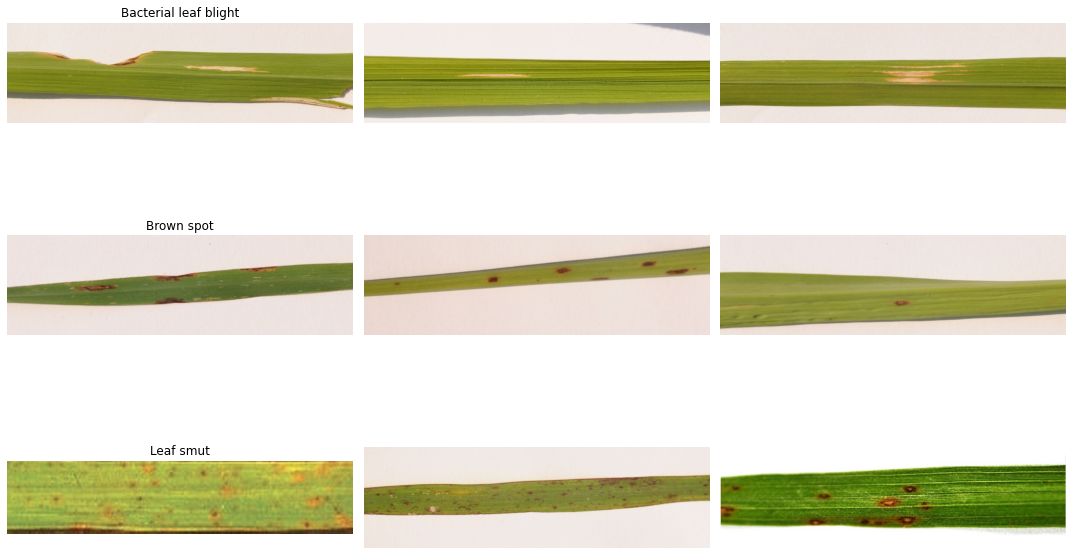

In [14]:
import matplotlib.pyplot as plt
import cv2
import random

# Function to display sample images from each category
def plot_sample_images(dataset_path, class_names, num_samples=3):
    fig, axes = plt.subplots(len(class_names), num_samples, figsize=(15, 10))
    
    for i, class_name in enumerate(class_names):
        class_folder = os.path.join(dataset_path, class_name)
        image_files = os.listdir(class_folder)
        
        # Select random sample images
        sample_images = random.sample(image_files, min(num_samples, len(image_files)))
        
        for j, img_file in enumerate(sample_images):
            img_path = os.path.join(class_folder, img_file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            
            axes[i, j].imshow(img)
            axes[i, j].axis("off")
            if j == 0:
                axes[i, j].set_title(class_name, fontsize=12)

    plt.tight_layout()
    plt.show()

# Display sample images from each category
plot_sample_images(structured_dataset_path, organized_classes)


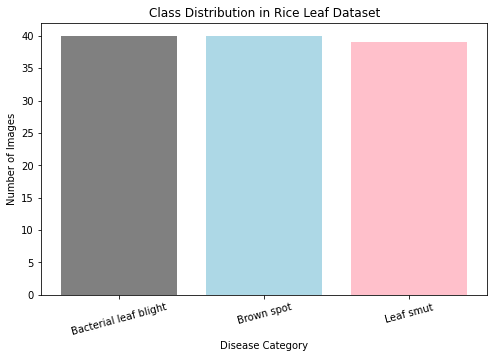

{'Bacterial leaf blight': 40, 'Brown spot': 40, 'Leaf smut': 39}

In [26]:
from collections import Counter

# Count the number of images in each category
class_distribution = {class_name: len(os.listdir(os.path.join(structured_dataset_path, class_name))) 
                      for class_name in organized_classes}

# Plot class distribution
plt.figure(figsize=(8, 5))
plt.bar(class_distribution.keys(), class_distribution.values(), color=['gray', 'lightblue', 'pink'])
plt.xlabel("Disease Category")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Rice Leaf Dataset")
plt.xticks(rotation=15)
plt.show()

# Display the distribution counts
class_distribution

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define dataset path
dataset_path = r"C:\Users\91751\Downloads\Rice_Leaf\Data\rice_leaf_structured"

# Data augmentation and normalization
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

# Load training and validation datasets
train_data = datagen.flow_from_directory(
    dataset_path, target_size=(150, 150), batch_size=16, 
    class_mode='categorical', subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path, target_size=(150, 150), batch_size=16, 
    class_mode='categorical', subset='validation'
)


Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


In [33]:
import tensorflow as tf# Define CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes for classification
])

In [35]:
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5149 - loss: 1.1473 - val_accuracy: 0.6522 - val_loss: 0.8446
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6548 - loss: 0.7856 - val_accuracy: 0.6087 - val_loss: 0.9514
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6353 - loss: 0.7507 - val_accuracy: 0.6087 - val_loss: 0.9506
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8336 - loss: 0.5814 - val_accuracy: 0.6522 - val_loss: 0.7617
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6693 - loss: 0.6729 - val_accuracy: 0.5652 - val_loss: 0.8131
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8659 - loss: 0.4101 - val_accuracy: 0.6957 - val_loss: 0.7761
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9019 - loss: 0.3420 - val_accuracy: 0.6522 - val_loss: 0.8109
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9771 - loss: 0.1905 - val_accuracy: 0.6522 - val_loss: 1.1117
Epoch 9/

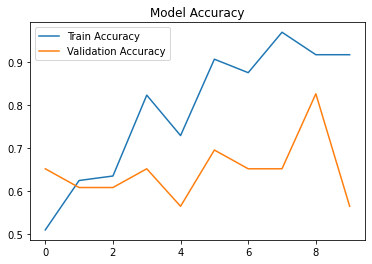

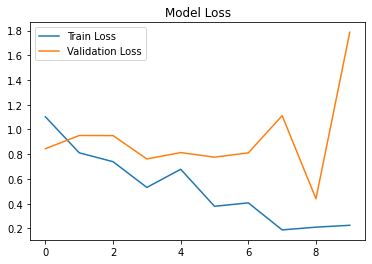

In [36]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [40]:
model.save(r"C:\Users\91751\Downloads\Rice_Leaf\Data\rice_leaf_cnn_model.h5")

#### Testing

In [43]:
import tensorflow as tf
import numpy as np
import cv2

# Load the saved model
model = tf.keras.models.load_model(r"C:\Users\91751\Downloads\Rice_Leaf\Data\rice_leaf_cnn_model.h5")

# Define class labels
class_labels = ['Leaf Smut', 'Brown Spot', 'Bacterial Leaf Blight']

In [53]:
def preprocess_image(image_path):  # Pass the image path as a parameter
    import cv2
    import numpy as np

    img = cv2.imread(image_path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (150, 150))  # Resize to 150x150 pixels
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Call the function with the correct syntax
image_path = r"C:\Users\91751\Downloads\img.jpg"  # Use raw string (r"") to avoid path errors
processed_img = preprocess_image(image_path)


In [54]:
def predict_image(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    class_index = np.argmax(prediction)  # Get the predicted class index
    class_name = class_labels[class_index]  # Get class name
    confidence = np.max(prediction)  # Get confidence score
    
    print(f"Predicted Class: {class_name}")
    print(f"Confidence: {confidence:.2f}")
    
    return class_name, confidence

# Test with an image (replace 'test_image.jpg' with actual image path)
test_image_path = r"C:\Users\91751\Downloads\img.jpg"  # Update with test image path
predict_image(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
Predicted Class: Bacterial Leaf Blight
Confidence: 1.00


('Bacterial Leaf Blight', 1.0)